In [17]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [18]:
img = Image.open('bird.png')
print(img)
img_np = np.asarray(img)
print(img_np)
img_np.shape

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x168 at 0x13497B1B6A0>
[[[115 155  32]
  [114 154  31]
  [113 153  31]
  ...
  [ 92 149  55]
  [ 92 149  55]
  [ 92 149  55]]

 [[114 154  31]
  [114 154  32]
  [111 152  30]
  ...
  [ 92 149  55]
  [ 92 149  55]
  [ 91 148  54]]

 [[113 153  31]
  [112 152  30]
  [110 151  31]
  ...
  [ 91 148  54]
  [ 91 148  54]
  [ 90 147  53]]

 ...

 [[ 79 130  25]
  [ 79 130  25]
  [ 79 130  25]
  ...
  [ 61 110  21]
  [ 61 110  21]
  [ 57 106  17]]

 [[ 79 130  25]
  [ 79 130  25]
  [ 79 130  25]
  ...
  [ 58 112  18]
  [ 56 110  16]
  [ 52 106  12]]

 [[ 79 130  25]
  [ 79 130  25]
  [ 79 131  23]
  ...
  [ 56 110  16]
  [ 56 110  16]
  [ 56 110  16]]]


(168, 300, 3)

In [19]:
pixels = img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape

(50400, 3)

In [20]:
model = KMeans(n_clusters = 6)
model.fit(pixels)

KMeans(n_clusters=6)

In [21]:
pixels_centroids = model.labels_
cluster_centers = model.cluster_centers_
pixels_centroids

array([0, 0, 0, ..., 3, 3, 3])

In [22]:
cluster_centers

array([[ 99.03242656, 150.67144187,  51.30844022],
       [ 37.32049403,  31.35210383,  20.66757379],
       [219.88575181, 206.20518713, 196.6654629 ],
       [ 73.97945464, 117.02023121,  30.43804976],
       [193.19759953, 108.89812646,   7.6030445 ],
       [148.1670504 , 135.27884369, 112.44052187]])

In [23]:
final = np.zeros((pixels_centroids.shape[0],3))

In [24]:
final.shape

(50400, 3)

In [25]:
for cluster_no in range(6):
    final[pixels_centroids==cluster_no] = cluster_centers[cluster_no]
final

array([[ 99.03242656, 150.67144187,  51.30844022],
       [ 99.03242656, 150.67144187,  51.30844022],
       [ 99.03242656, 150.67144187,  51.30844022],
       ...,
       [ 73.97945464, 117.02023121,  30.43804976],
       [ 73.97945464, 117.02023121,  30.43804976],
       [ 73.97945464, 117.02023121,  30.43804976]])

In [26]:
comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image.shape

(168, 300, 3)

In [27]:
comp_image =Image.fromarray(np.uint8(comp_image))
comp_image.save('bird1.png')

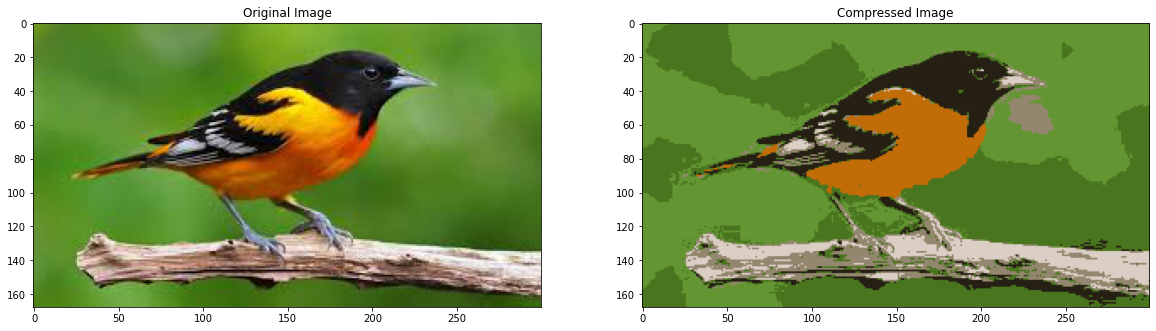

In [30]:
fname = 'bird.png'
fname1 = 'bird1.png'
img1 = mpimg.imread(fname,0)
img2 = mpimg.imread(fname1,0)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,20))
ax1.imshow(img1)
ax1.set_title('Original Image')
ax2.imshow(img2)
ax2.set_title('Compressed Image')
plt.show()

In [31]:
import os
print('Size of Original Image',int(os.stat('bird.png').st_size/1024),'kB')
print('Size of the Compressed Image',int(os.stat('bird1.png').st_size/1024),'kB')

Size of Original Image 6 kB
Size of the Compressed Image 6 kB
